In [37]:
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
import re
import requests
import os
import seaborn as sns
tqdm.pandas()
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [41]:
sns.set_style("dark")

In [42]:
em = pd.read_excel('data/2209201114_DA_GHGI_1990-2020_Final_v4.1_AR4_AR5.xlsm', sheet_name='UK By Source_AR5', header=16, usecols='B:AC')
em['NCFormat'] = em.NCFormat.fillna(method='ffill')
em = em.melt(id_vars=['NCFormat', 'IPCC_name'])
em = em[em.variable != 'BaseYear']
em['variable']=em['variable'].apply(pd.to_datetime)

In [43]:
em[em.variable == em.variable.max()].NCFormat.unique()

array(['Agriculture', 'Agriculture Total', 'Business', 'Business Total',
       'Energy Supply', 'Energy Supply Total', 'Industrial processes',
       'Industrial processes Total',
       'Land use, land use change and forestry',
       'Land use, land use change and forestry Total', 'Public',
       'Public Total', 'Residential', 'Residential Total', 'Transport',
       'Transport Total', 'Waste Management', 'Waste Management Total',
       'Grand Total'], dtype=object)

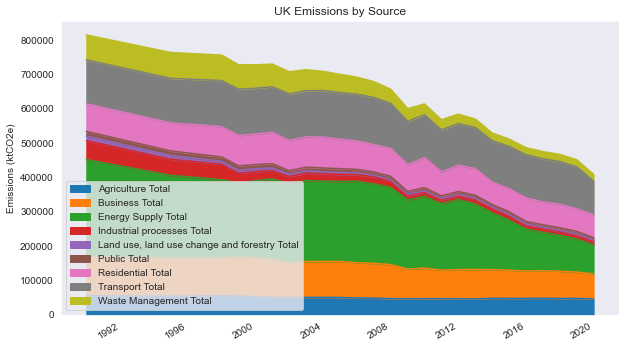

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

em[em.NCFormat.str.contains('Total')].pivot(index='variable', columns='NCFormat', values='value')[
    ['Agriculture Total', 'Business Total', 'Energy Supply Total',
    'Industrial processes Total',
       'Land use, land use change and forestry Total', 'Public Total',
       'Residential Total', 'Transport Total', 'Waste Management Total']
].plot(kind='area', ax=ax)

ax.legend(loc='lower left')
ax.set_title('UK Emissions by Source')
ax.set_ylabel('Emissions (ktCO2e)')
ax.set_xlabel('')

plt.show()

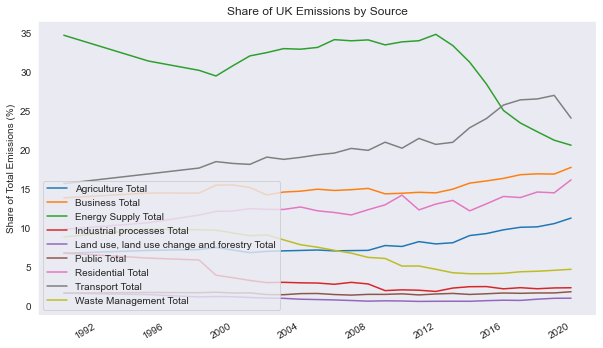

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

em_sel = em[em.NCFormat.str.contains('Total')].pivot(index='variable', columns='NCFormat', values='value')[
    ['Agriculture Total', 'Business Total', 'Energy Supply Total',
    'Industrial processes Total',
       'Land use, land use change and forestry Total', 'Public Total',
       'Residential Total', 'Transport Total', 'Waste Management Total']
]

(100*(em_sel.div(em_sel.sum(axis=1), axis=0))).plot(ax=ax)

ax.legend(loc='lower left')
ax.set_title('Share of UK Emissions by Source')
ax.set_ylabel('Share of Total Emissions (%)')
ax.set_xlabel('')

plt.show()